<a href="https://colab.research.google.com/github/subrataBAEC/Deep-Learning-Basics/blob/main/Bank_customer_churn/Bank_customer_churn_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank Customer Churin prediction using ANN
### 1. Data cleaning
### 2. Prediction using ANN
##### **Prepared By**: Subrata Saha
##### **Email**: subratabaec@gmail.com
##### **Time**: Feb, 2023

## 1.Import libraries and dataset

In [322]:
# !pip install tensorflow-gpu
# !pip install tensorflow 

In [323]:
import tensorflow as tf
print(tf.__version__)

2.11.0


### i.Import Libraries

In [324]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

# scaling
from sklearn.preprocessing import MinMaxScaler

# split
from sklearn.model_selection import train_test_split

### ii. Load Dataset From Drive

In [325]:
# for google colab
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [326]:
# load data
df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/Deep_learning_2023/practice/Bank_customer_churn/Bank_Churn_Modelling.csv")

display(df.head(5))
# df.head()
print("shape: ",df.shape)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


shape:  (10000, 14)


## 2.Data Cleaning

### i. Drop Unnecessary Columns

**Note:**
Drop unnecessary columns. "CustomerId", "RowNumber" , "Surname" and check for duplicate rows.

In [327]:
# get all column names
# column_names = list(df.columns.values)
# print(column_names)

In [328]:
# drop unnecessary columns check column types
df.drop(['CustomerId','RowNumber', 'Surname'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [329]:
# check imbalance
print(df['Exited'].value_counts())

0    7963
1    2037
Name: Exited, dtype: int64


**Note:** There is an imbalance in the dataset.

### ii. Cetegorical and Numerical Columns

**Note:** make two separate lists containing categorical and numerical columns.

In [330]:
# separate categorical and numerical columns
# print(df.dtypes.Gender) # single col type
cat_cols=[]
num_cols=[]

for col in df:
  if df.dtypes[col]=='object':
    # print(col)
    cat_cols.append(col)
  else:
    # print(col) 
    num_cols.append(col)

print(cat_cols)
print(num_cols)


['Geography', 'Gender']
['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


**Note:**
Two categorical columns ('Geography', 'Gender'). need to encode later.

### iii. Check For Duplicate Records

In [331]:
# check duplicate records/rows
bool_series = df.duplicated(keep='first')
print('Boolean series:')
print(bool_series)

Boolean series:
0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool


***Note:***
It seems no NULL and duplicate values. find unique values of all column.

### iv. Find Unique Values

In [332]:
# function to find unique
def find_unique(df):
  for col in df:
    print(f"{col}: {df[col].unique()}")
find_unique(df)

CreditScore: [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 5

**Note:**
- it seems no NaN, NA or blank characters are present in any column.

### v. Check For white space

In [333]:
# check for blank characters in all cols
black_values = df.isna().any()

print(black_values)

CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool


In [334]:
# total number of white space values in all columns
for col in df.columns:
    print(col, (df[col].astype(str) == ' ').sum())

CreditScore 0
Geography 0
Gender 0
Age 0
Tenure 0
Balance 0
NumOfProducts 0
HasCrCard 0
IsActiveMember 0
EstimatedSalary 0
Exited 0


**Note:**
No rows contain BLANK.

### vi. Encoding

**Note:** 
Now encode categorical columns.

#### Label Encoding

In [335]:
# from sklearn.preprocessing import LabelEncoder

# label encode a single column
# # create a label encoder object
# le = LabelEncoder()

# # fit the label encoder to the "Geography" column in the dataframe
# le.fit(df['Geography'])

# # transform the "Geography" column using the label encoder
# df['Geography_encoded'] = le.transform(df['Geography'])


# label encode multiple columns using for loop
from sklearn.preprocessing import LabelEncoder

# create a label encoder object
le = LabelEncoder()

# specify the columns to label encode
columns_to_encode = cat_cols

# iterate over each column and apply label encoding
for col in columns_to_encode:
    le.fit(df[col])
    df[col + '_encoded'] = le.transform(df[col])

df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_encoded,Gender_encoded
8607,602,Germany,Male,38,2,71667.97,2,0,0,137111.89,0,1,1
522,527,Spain,Male,37,5,93722.73,2,1,1,139093.73,0,2,1
586,621,Spain,Male,53,9,170491.84,1,1,0,35588.07,1,2,1
3421,593,France,Female,39,0,117704.73,1,1,0,197933.50,0,0,0
3241,621,Germany,Female,31,8,100375.39,1,1,1,90384.26,0,1,0


#### One-Hot Encoding

In [336]:
# # # perform one-hot encoding
# # one_hot_encoded = pd.get_dummies(cat_cols)

# # # join the encoded dataframe with the original dataframe
# # df = pd.concat([df, one_hot_encoded], axis=1)

# # perform one-hot encoding on multiple columns
# one_hot_encoded = pd.get_dummies(df[['Geography', 'Gender']],drop_first=True)

# # join the encoded dataframe with the original dataframe
# df = pd.concat([df, one_hot_encoded], axis=1)

# # print the resulting dataframe
# df.head()

**Note:** drop 'Gender' and 'Geography' columns as they are already encoded.

In [337]:
# drop columns 'Gender' and 'Geography'
df = df.drop(cat_cols, axis=1)

In [338]:
df.dtypes

CreditScore            int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_encoded      int64
Gender_encoded         int64
dtype: object

Note:
- All columns are in numeric format.
- Check summary statistics

In [339]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_encoded,Gender_encoded
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.746300,0.545700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.827529,0.497932
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,1.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,2.000000,1.000000


**Note:** 
- There are some larges values. need scaling
- Applying Min-Max scaling

### vii. Feature Scaling

#### Min-Max scaler

In [340]:
# # scaling all variables
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# df=scaler.fit_transform(df)

In [341]:
# scaling selected variables 
# variables those have values other than 0 or 1 are chosen.

cols_to_scale = ['CreditScore','Age','Tenure', 'NumOfProducts', 'Balance', 'EstimatedSalary']

# scaling 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

# check after scaling
for col in df:
    print(f'{col}: {df[col].unique()}')

CreditScore: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.4

#### Standard scaler

In [342]:
# from sklearn.preprocessing import StandardScaler

# # create a StandardScaler object
# scaler = StandardScaler()

# # fit the scaler to the data
# scaler.fit(df)

# # transform the data using the scaler
# scaled_data = scaler.transform(df)

# # create a new dataframe with the scaled data
# df= pd.DataFrame(scaled_data, columns=df.columns)

# # print the resulting dataframe
# print(df)
# df.describe()

# give negative values.

**Note:** Now df is ready for separating into dependent and independent variable.

## 3.Train-Test Split

In [343]:
# separating 
X = df.drop('Exited',axis=1)
y = df['Exited']

# split
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, test_size=0.2,random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_test.shape)


(8000, 10)
(2000, 10)
(2000,)


## 4.ANN model

### i. ANN modfel buidling method 1

In [344]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU # activation function
from tensorflow.keras.layers import Dropout # to reduce overfitting

In [345]:
# way 1
# Initialising the ANN
classifier = Sequential()

# Adding the input layer
classifier.add(Dense(units=10,activation='relu')) # input variable= 24

# Adding the first hidden layer
classifier.add(Dense(units=10,activation='relu')) # 6, or 7 not fixed

# Adding the second hidden layer
classifier.add(Dense(units=6,activation='relu'))

# Adding the output layer
classifier.add(Dense(units=1, activation='sigmoid'))

# # change learning rate
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy']) #The default learning rate is 0.001

In [346]:
# early stopping
import tensorflow as tf
early_stopping= tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=3,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [347]:
# model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size=20, epochs=50) # without early stopping
model_history=classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=50, callbacks=early_stopping)

Epoch 1/50
536/536 [==============================] - 4s 5ms/step - loss: 0.4723 - accuracy: 0.7987 - val_loss: 0.4574 - val_accuracy: 0.7921
Epoch 2/50
536/536 [==============================] - 3s 6ms/step - loss: 0.4405 - accuracy: 0.8151 - val_loss: 0.4316 - val_accuracy: 0.8266
Epoch 3/50
536/536 [==============================] - 2s 5ms/step - loss: 0.4284 - accuracy: 0.8240 - val_loss: 0.4143 - val_accuracy: 0.8372
Epoch 4/50
536/536 [==============================] - 3s 5ms/step - loss: 0.4162 - accuracy: 0.8289 - val_loss: 0.4096 - val_accuracy: 0.8349
Epoch 5/50
536/536 [==============================] - 2s 5ms/step - loss: 0.3904 - accuracy: 0.8442 - val_loss: 0.3794 - val_accuracy: 0.8519
Epoch 6/50
536/536 [==============================] - 2s 5ms/step - loss: 0.3724 - accuracy: 0.8505 - val_loss: 0.3701 - val_accuracy: 0.8546
Epoch 7/50
536/536 [==============================] - 3s 6ms/step - loss: 0.3704 - accuracy: 0.8515 - val_loss: 0.3701 - val_accuracy: 0.8489
Epoch 

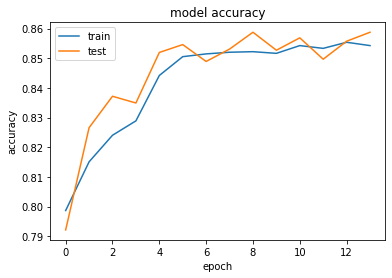

In [348]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

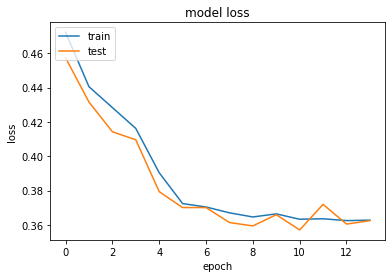

In [349]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [350]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 1ms/step


In [351]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1547,   46],
       [ 252,  155]])

In [352]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.851

In [353]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1593
           1       0.77      0.38      0.51       407

    accuracy                           0.85      2000
   macro avg       0.82      0.68      0.71      2000
weighted avg       0.84      0.85      0.83      2000



### ii. ANN modfel buidling method 2

In [354]:
# way 2
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(10,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_history=model.fit(X_train, y_train, validation_split=0.33, epochs=100)

Epoch 1/100
168/168 [==============================] - 2s 5ms/step - loss: 0.5170 - accuracy: 0.7811 - val_loss: 0.4916 - val_accuracy: 0.7921
Epoch 2/100
168/168 [==============================] - 1s 4ms/step - loss: 0.4756 - accuracy: 0.7983 - val_loss: 0.4762 - val_accuracy: 0.7921
Epoch 3/100
168/168 [==============================] - 1s 4ms/step - loss: 0.4613 - accuracy: 0.8013 - val_loss: 0.4629 - val_accuracy: 0.7989
Epoch 4/100
168/168 [==============================] - 1s 4ms/step - loss: 0.4476 - accuracy: 0.8078 - val_loss: 0.4524 - val_accuracy: 0.8020
Epoch 5/100
168/168 [==============================] - 1s 6ms/step - loss: 0.4379 - accuracy: 0.8123 - val_loss: 0.4413 - val_accuracy: 0.8080
Epoch 6/100
168/168 [==============================] - 1s 6ms/step - loss: 0.4320 - accuracy: 0.8151 - val_loss: 0.4372 - val_accuracy: 0.8141
Epoch 7/100
168/168 [==============================] - 1s 7ms/step - loss: 0.4267 - accuracy: 0.8175 - val_loss: 0.4392 - val_accuracy: 0.8118

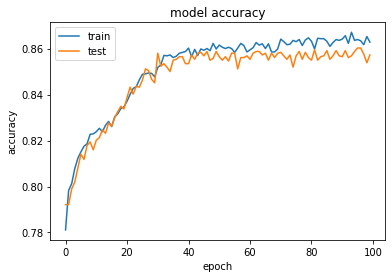

In [355]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

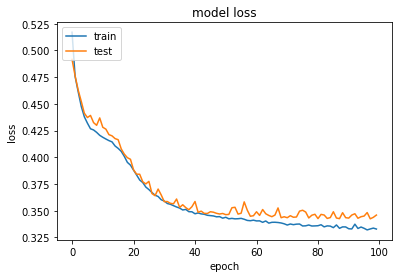

In [356]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [357]:

# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 1ms/step


In [358]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1547,   46],
       [ 239,  168]])

In [359]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8575

In [360]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.79      0.41      0.54       407

    accuracy                           0.86      2000
   macro avg       0.83      0.69      0.73      2000
weighted avg       0.85      0.86      0.84      2000



Note:
- Label encoding and One-hot encoding gives almost same accuracy (from 85-86% accuracy).
- Epochs 50-100 gives same accuracy. 
- if early stoping is used, code stops at 14 epochs. accuracy drops from 85% to 81%.
- Standard scaler transform values in negative too. so gives unexpected results.


**Acknowledgement:** 
- Motivated from:
- https://www.kaggle.com/datasets/barelydedicated/bank-customer-churn-modeling?resource=download